In [1]:
import os, re
import win32com.client
import numpy as np
from konlpy.tag import Kkma
from PIL import Image
from collections import Counter
from wordcloud import ImageColorGenerator, WordCloud, get_single_color_func
import matplotlib.pyplot as plt
%matplotlib inline


# file path를 정의합니다.
dir_path = os.getcwd()
file_path = dir_path + "\src\conversation.docx"

# 꼬꼬마 형태소 분석기 생성
pos = Kkma()

# 클라우드 폰트 지정
FONT_PATH = 'C:/Windows/Fonts/나눔스퀘어라운드/NanumSquareRoundL.ttf' 

In [9]:
'''
정의된 함수
1. context_exporter : docx 파일 내의 텍스트를 추출합니다.
2. context_parser : context에서 특수문자 및 기타 오타등을 제거합니다.
3. nouns_exporter : context들을 형태소 분석합니다.
4. stopwording : 추출된 형태소 내에서 불용어를 제거합니다.
5. aggregater : 최종 nouns를 하나로 합칩니다.
'''

def context_exporter(filepath):
    
    # win32com module object 생성 및 docx 파일 열기
    word = win32com.client.Dispatch("Word.Application")
    wb = word.Documents.Open(file_path)
    
    # docx 파일 선택
    doc = word.ActiveDocument
    print("선택된 파일 : ", doc)
    
    # docx 파일 내 text context를 가져옵니다.
    context = doc.Range().Text
    
    return context

def context_parser(context):

    parse = re.sub('[-=.#/:$}()-.‘’!?-“\x0c”ㄱㄴㄷㄹㅁㅂㅅㅇㅈㅊㅋㅍㅠㅎ<#~;…\n]','',context)

    # 띄워쓰기 제거
    parsed_context = parse.replace('\n','')
    print("=== 파싱완료 === \n\n", parsed_context)

    # parsing된 context 내에서 '\r'를 기준으로 split 합니다.
    context_list = parsed_context.split('\r')

    # context_list 내에서 빈 item를 제거합니다.
    context_list = list(filter(None, context_list))
    
    return context_list

def nouns_exporter(context_list):

    # nouns 리스트 생성
    nouns_list = []
    
    # 파싱을 완료한 데이터에서 한 context씩 꺼내서 konlpy 형태소 분석기로 형태소 분석 후 nouns 리스트에 저장
    for idx, item in enumerate(context_list):
        print("--------------------------------")
        print("순서 : ", idx)
        print("context : ", item)

        pos_list = []
        pos_list = pos.nouns(item)

        if not pos_list:
            # print("Empty item")
            pass
        else:
            for i in range(len(pos_list)):
                nouns_list.append(pos_list[i])
        
        print("현재까지 모아진 nouns 수 :", len(nouns_list))

    return nouns_list

def stopwording(nouns):
    print("=== stopwording ===")
    
    
    # stopwording(불용어 사전으로 필터링)
    with open('./src/stopwords.txt', 'r', encoding='utf8') as f:
        stopwords = f.read()
    
    print("stopwords :", stopwords)
    print("Origin nouns length is ",len(nouns))
    print("==================")
    
    # unique nouns 추출
    unique_nouns = set(nouns)
    
    # stopwords에 unique nouns가 존재하면 제거
    for word in unique_nouns:
        if word in stopwords:
            while word in nouns: nouns.remove(word)
    
    print("\nChanged nouns length is ",len(nouns))
    return nouns

def aggregater(nouns):
    
    aggregated_nouns = ''
    
    for word in nouns:
        aggregated_nouns = aggregated_nouns + ' ' + word
    
    print("=== 최종 형태소 그룹 === \n", noun_text)
    return aggregated_nouns

In [3]:
# 1. 텍스트 파일 추출
context = context_exporter(filepath = file_path)
print("\n=== 추출완료 === \n\n", context)

선택된 파일 :  conversation.docx

=== 추출완료 === 




In [4]:
# 2. 특수문자 및 기타 오타등의 불필요한 요소 파싱
context_list = context_parser(context)

=== 파싱완료 === 




In [ ]:
# 3. 형태소 분석
nouns = nouns_exporter(context_list)

--------------------------------
순서 :  0
context :  발제
현재까지 모아진 nouns 수 : 1
--------------------------------
순서 :  1
context :  영화의 첫인상이 어땟는지 한 두줄로 적어주세요
현재까지 모아진 nouns 수 : 5
--------------------------------
순서 :  2
context :  왜인생의 한 파트를 '버스타기'라고 표현했을가요
현재까지 모아진 nouns 수 : 12
--------------------------------
순서 :  3
context :  왜       라고 표현했는지 생각해보세요
현재까지 모아진 nouns 수 : 15
--------------------------------
순서 :  4
context :  주인공 크리스의 말에          '     라는 장면이 나옵니다 영화 초입 감독이 어떤 느낌을 나타내고자 했을가요
현재까지 모아진 nouns 수 : 24
--------------------------------
순서 :  5
context :  어떤 아저씨가 골밀도 측정기를 타임머신이라고 부릅니다 무엇을 표현하고자 했을까요
현재까지 모아진 nouns 수 : 32
--------------------------------
순서 :  6
context :  아들이랑 농구하던 크리스는 아들에게 꿈을 가지고 그걸 보호하라고 합니다 심지어 아빠 자신까지도 그걸 못한다고 해도 말입니다 우리도 살면서 이상과 현실의 대립사이에서 꿈을 지킬 수 있나요
현재까지 모아진 nouns 수 : 51
--------------------------------
순서 :  7
context :   


In [10]:
# 5. word counter test
c = Counter(nouns)

# 상위 100개 출력 테스트
print(c.most_common(100)) 

[('나', 125), ('생각', 119), ('사람', 111), ('다희', 80), ('정', 79), ('정습', 67), ('일', 65), ('예은', 63), ('현선', 60), ('친구', 59), ('내가', 57), ('지용', 56), ('재환', 50), ('영화', 45), ('기억', 45), ('시간', 43), ('말', 41), ('요즘', 36), ('이야기', 34), ('상상', 33), ('느낌', 30), ('때문', 29), ('4', 29), ('자기', 28), ('1', 28), ('자신', 27), ('지금', 27), ('2', 27), ('마음', 27), ('시', 27), ('여행', 25), ('성격', 25), ('3', 25), ('처음', 25), ('무엇', 24), ('우리', 23), ('월', 23), ('공부', 22), ('이유', 22), ('중요', 21), ('학교', 20), ('사랑', 20), ('집', 20), ('사진', 20), ('시작', 20), ('얘기', 20), ('이후', 20), ('날', 19), ('알바', 19), ('연애', 19), ('행복', 18), ('모습', 18), ('혼자', 18), ('도', 17), ('함', 17), ('언니', 17), ('그것', 16), ('맥', 16), ('이것', 16), ('년', 16), ('건', 16), ('경험', 16), ('표현', 15), ('가지', 15), ('남자', 15), ('노력', 15), ('아이', 15), ('다음', 15), ('연락', 15), ('주인공', 14), ('상황', 14), ('인생', 14), ('끝', 14), ('믿음', 14), ('누나', 14), ('영향', 14), ('감정', 14), ('여러분', 14), ('고', 14), ('이랑', 14), ('사실', 14), ('형', 14), ('이번', 13), ('5', 13), ('시험',

In [11]:
# 6. 불용어 제거 (stopwording)
nouns = stopwording(nouns)

# stopwording result
print(' '.join(nouns))

=== stopwording ===
stopwords : 것 때 저 수 예 근데 현 거 지 중 데 내 뭐 전 애 그 라 바 리 편 듯 한 들 후 안 얘 걔 뭔가 둘 그걸 이 곳 줄 두 어캐 음 은 습 예 여 번 
Origin nouns length is  8911

Changed nouns length is  8911
발제 영화 첫인상 땟 왜인 파트 버스 버스타기 타기 표현 가요 표현 생각 주인공 크리스 말 장면 영화 초입 감독 느낌 가요 아저씨 골 골밀도 밀도 측정기 타임머신 무엇 표현 아들 농구 크리스 꿈 그것 보호 보호하라 하라 아빠 자신 도 말 우리 이상 현실 대립 대립사이 사이 영화 동의 자신 생각 만약 당신 인터뷰 셔츠 바지 영화 주인공 주인공크리스 크리스 아들 아들크리토퍼 크리 토퍼 행동 말 만약 자신 아빠 엄마 공감 부분 추구 자신 삶 파트 버스 버스타기 타기 행복 변화 때문 생각 영화 영화속 속 삶 부분 버스 버스타기 타기 짓 행복 등 묘사 자신 모습 영화 외의 파트 자신 생각 행복 무엇 자신 직업적 꿈 장래 무엇 개인적 직업적 장래 장래희망 희망 선택 선택하라 하라 사회 직업 이상적 꿈 목표 목표등 등 근황 근황토크 토크 제주 제주도 제주도여행 도 여행 최고 게스트 게스트하우스 하우스 파티 아쉬움 맥 맥날 날 필터링 학교 학교특강 특강 임 새 채널 앞 영상 영상제작예쩡 제작 쩡 태국 일본 일본여행 여행 우 고취 고취준중 준중 영화 첫인상 땟 치열 소시민 생활 크리 크리스토퍼 스토퍼 자기 자기상황 상황 공감 선물 느낌 세상 다양 사람 시간대 일상 중함 인턴 바웃 바웃타임 타임 느낌 복합적 인생 파트 버스 버스타기 타기 표현 가요 종착역 추락 종착 역 인생 부분 끝 버스 감 인생 버스 기본적 권리 자기 선택 표현 행복 여정 표현 버스 일상 표현 반복 때문 아저씨 골 골밀도 밀도 측정기 타임머신 무엇 표현 다 측정기 옛날 자기 행복 추억 매개체 타임머신 생각 줌 노숙자 주인공 반대 황금 황금과거 과거 진취적 표현 생각 행복 사이 단어 생각 행복 을

In [25]:
nouns  = aggregater(nouns = nouns)

=== 최종 형태소 그룹 === 
  발제 영화 첫인상 땟 왜인 파트 버스 버스타기 타기 표현 가요 표현 생각 주인공 크리스 말 장면 영화 초입 감독 느낌 가요 아저씨 골 골밀도 밀도 측정기 타임머신 무엇 표현 아들 농구 크리스 꿈 그것 보호 보호하라 하라 아빠 자신 도 말 우리 이상 현실 대립 대립사이 사이 영화 동의 자신 생각 만약 당신 인터뷰 셔츠 바지 영화 주인공 주인공크리스 크리스 아들 아들크리토퍼 크리 토퍼 행동 말 만약 자신 아빠 엄마 공감 부분 추구 자신 삶 파트 버스 버스타기 타기 행복 변화 때문 생각 영화 영화속 속 삶 부분 버스 버스타기 타기 짓 행복 등 묘사 자신 모습 영화 외의 파트 자신 생각 행복 무엇 자신 직업적 꿈 장래 무엇 개인적 직업적 장래 장래희망 희망 선택 선택하라 하라 사회 직업 이상적 꿈 목표 목표등 등 근황 근황토크 토크 제주 제주도 제주도여행 도 여행 최고 게스트 게스트하우스 하우스 파티 아쉬움 맥 맥날 날 필터링 학교 학교특강 특강 임 새 채널 앞 영상 영상제작예쩡 제작 쩡 태국 일본 일본여행 여행 우 고취 고취준중 준중 영화 첫인상 땟 치열 소시민 생활 크리 크리스토퍼 스토퍼 자기 자기상황 상황 공감 선물 느낌 세상 다양 사람 시간대 일상 중함 인턴 바웃 바웃타임 타임 느낌 복합적 인생 파트 버스 버스타기 타기 표현 가요 종착역 추락 종착 역 인생 부분 끝 버스 감 인생 버스 기본적 권리 자기 선택 표현 행복 여정 표현 버스 일상 표현 반복 때문 아저씨 골 골밀도 밀도 측정기 타임머신 무엇 표현 다 측정기 옛날 자기 행복 추억 매개체 타임머신 생각 줌 노숙자 주인공 반대 황금 황금과거 과거 진취적 표현 생각 행복 사이 단어 생각 행복 을 추구 의미 미래 지금 행복하라 하라 너희 만 행복 나 의미 단어 철자 중요 행복 자체 발제 발제이외 이외 추가 추가적인 적인 내용 언어 언어유희 유희 의미 아내 크리 크리스토퍼 스토퍼 아내 크리 크리스토퍼 스토퍼 어린이 사랑 크리스 아빠 자기 충족 애기 밑 함 크리 크리스토퍼 스토

In [26]:
# 원하는 아이콘으로 mask 제작
mask = np.array(Image.open("./src/movie_icon.png"))

In [27]:
print(mask)

[[26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]
 ...
 [26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]]


In [28]:
for i in range(len(mask)):
#     print(mask)
    for j in range(len(mask[i])):
        if mask[i][j] == 26:
            mask[i][j] = 255

In [29]:
print(mask)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [49]:
# image_colors = ImageColorGenerator(mask)

In [35]:
wordcloud = WordCloud(#max_font_size=400,
                      max_words = 300,
                      width = 800,height = 800,
                      background_color='white', 
                      mask = mask,
                      font_path=FONT_PATH).generate(nouns)

In [37]:
import random

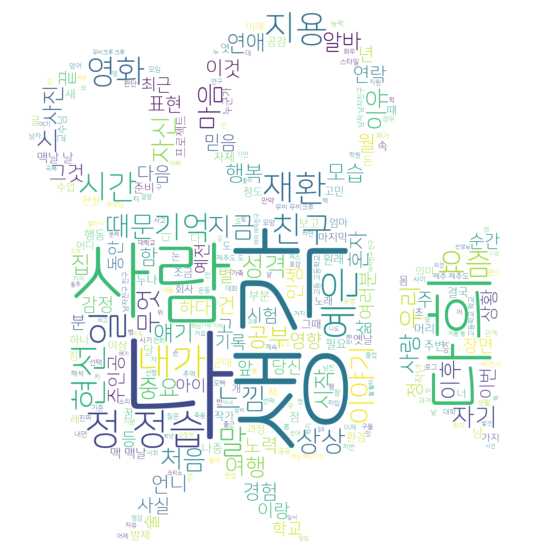

In [31]:
# plotting
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
# 생성한 wordcloud를 저장합니다.
wordcloud.to_file("wordcloud.png")

In [58]:
color_func1 = get_single_color_func('deepskyblue')


In [57]:
color_func1 = get_single_color_func('deepskyblue')

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(128, 128%%, %d%%)" % random.randint(0, 10)

color_func1 = get_single_color_func('deepskyblue')

# plotting
plt.figure(figsize=(10,10))
plt.imshow(wordcloud.recolor(color_func=color_func1, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.show()

AttributeError: module 'wordcloud' has no attribute 'recolor'

<Figure size 720x720 with 0 Axes>